In [1]:
import numpy as np
import scipy as sp
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage.morphology import disk, closing, medial_axis
from skimage.feature import peak_local_max

%matplotlib inline

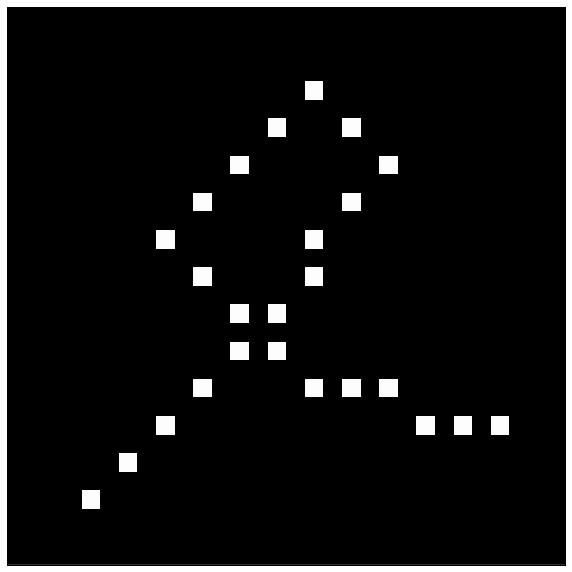

In [2]:
# import some points
# stored at: https://github.com/mycarta/rainbowbot/blob/master/stuff4path_finding/loop.txt
points = np.loadtxt('loop.txt', delimiter=",")

# plot 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(points, cmap='gray',interpolation= 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()

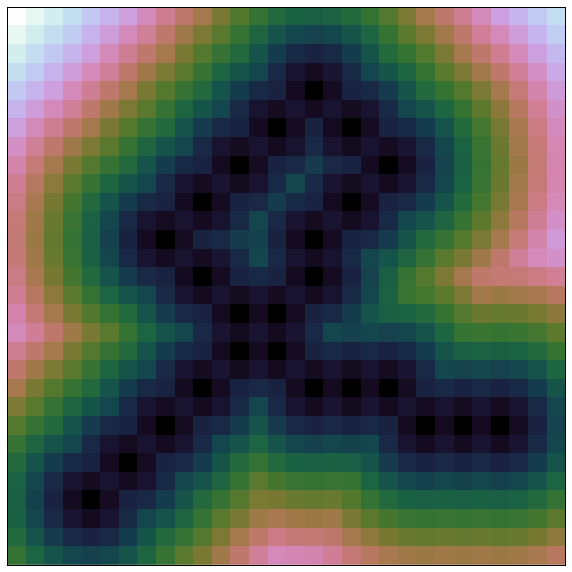

In [3]:
# distance transform
dstnc = sp.ndimage.distance_transform_edt(1-points)

# plot 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(dstnc, cmap='cubehelix',interpolation= 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()

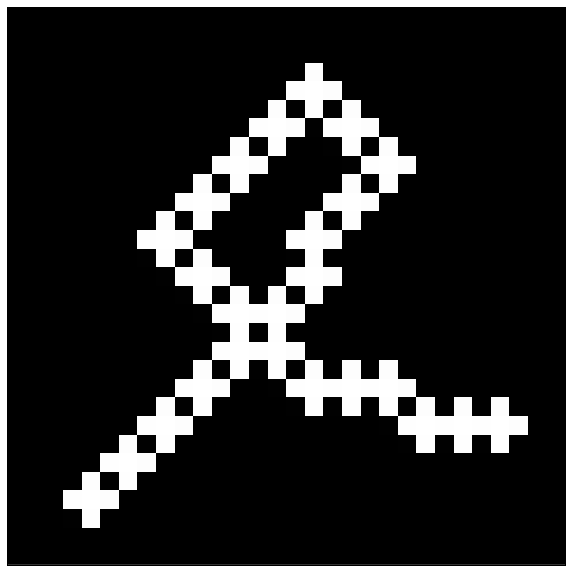

In [4]:
# find the local minima
local_min = peak_local_max(1-dstnc, indices=False, footprint=np.ones((3, 3)), labels=1-points)

# plot 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(local_min, cmap='cubehelix',interpolation= 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()

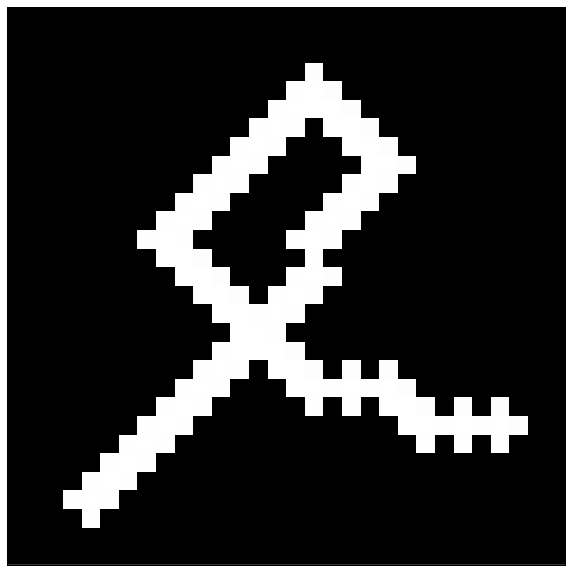

In [5]:
# fill small holes

filled = closing(local_min)

# plot 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(filled, cmap='gray',interpolation= 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()

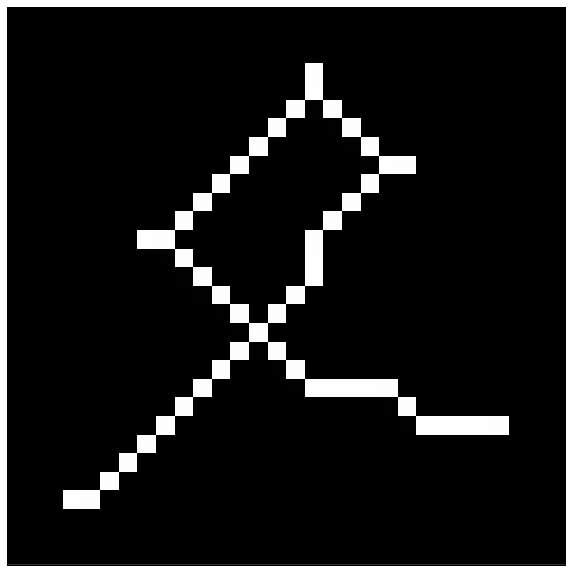

In [6]:
# skeletonize to get path
skel = medial_axis(filled)

# plot 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.imshow(skel, cmap='gray',interpolation= 'none')
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
plt.show()